In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('height_weight.csv')

In [3]:
dataset.head()

,Height,Weight
0,187.57,109.72
1,174.71,73.62
2,188.24,96.50
3,182.20,99.81
4,177.50,93.60


In [4]:
dataset.isnull().sum()

Height    46
Weight     0
dtype: int64

In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [9]:
x

array([[187.57],
       [174.71],
       [188.24],
       ...,
       [162.22],
       [175.35],
       [157.34]])

In [11]:
np.isnan(x).sum()

46

In [12]:
np.isnan(y).sum()

0

In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [17]:
np.isnan(x).sum()

46

In [18]:
x=imputer.fit_transform(x)

In [20]:
np.isnan(x).sum()

0

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred=lr.predict(x_test)
y_pred

array([ 67.48993898,  76.41509693, 101.81110276, ...,  64.16542111,
        63.87573283,  67.00712518])

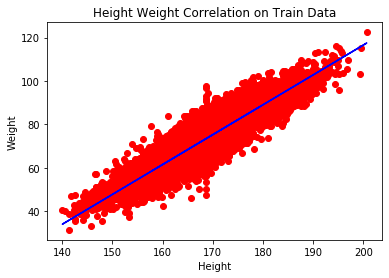

In [40]:
plt.title('Height Weight Correlation on Train Data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.show()

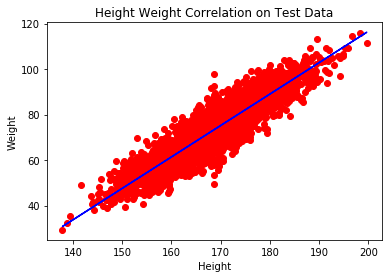

In [41]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,lr.predict(x_test),color='blue')
plt.title('Height Weight Correlation on Test Data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [48]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.520425289175486
Mean Squared Error: 32.35216934989533
Root Mean Squared Error: 5.687896742197007
